# Milestone 1

**Comprendre les données et les outils de base pour l'analyse de données :**

- Data acquisition
- Debugging tools
- Cleaning data
- Visualisations simples
- Visualisations avancées


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *


# 1 - Data acquisition
---

In [3]:
# Define the start and end years for the data acquisition
start_year = 2016
end_year = 2022

# Get the data from the NHL API
nhl_data_provider = get_data_from(start_year, end_year)

Successfully imported NHL data for the 2016 season.
Successfully imported NHL data for the 2017 season.
Successfully imported NHL data for the 2018 season.
Successfully imported NHL data for the 2019 season.
Successfully imported NHL data for the 2020 season.
Successfully imported NHL data for the 2021 season.
Successfully imported NHL data for the 2022 season.


In [4]:
# Display the first 5 rows of the regular season data for the 123rd game of the 2022 season
pprint.pprint(nhl_data_provider.regular_season[2020][123]['plays'][0:5])

[{'eventId': 101,
  'homeTeamDefendingSide': 'left',
  'periodDescriptor': {'maxRegulationPeriods': 3,
                       'number': 1,
                       'periodType': 'REG'},
  'situationCode': '1551',
  'sortOrder': 8,
  'timeInPeriod': '00:00',
  'timeRemaining': '20:00',
  'typeCode': 520,
  'typeDescKey': 'period-start'},
 {'details': {'eventOwnerTeamId': 7,
              'losingPlayerId': 8481559,
              'winningPlayerId': 8478403,
              'xCoord': 0,
              'yCoord': 0,
              'zoneCode': 'N'},
  'eventId': 102,
  'homeTeamDefendingSide': 'left',
  'periodDescriptor': {'maxRegulationPeriods': 3,
                       'number': 1,
                       'periodType': 'REG'},
  'situationCode': '1551',
  'sortOrder': 9,
  'timeInPeriod': '00:00',
  'timeRemaining': '20:00',
  'typeCode': 502,
  'typeDescKey': 'faceoff'},
 {'details': {'eventOwnerTeamId': 7,
              'playerId': 8478109,
              'xCoord': 57,
              'yCoord': 3


# 2 - Debugging tools
---

In [5]:
# List of seasons
season_list = np.arange(start_year, end_year + 1).tolist()

# 
ipywidgets.interact(plot_nhl_data, nhl_data_provider=ipywidgets.fixed(nhl_data_provider),
                    game_type=['regular', 'playoff'], season=season_list)

interactive(children=(Dropdown(description='game_type', options=('regular', 'playoff'), value='regular'), Drop…

<function src.debugging_tool.debugging_tool.plot_nhl_data(nhl_data_provider: src.fetch.NHLData.NHLData, game_type, season)>

# 3 - Data cleaning
---

In [6]:
# Clean the data
clean_regular_season, clean_playoff = clean_data(nhl_data_provider)

In [7]:
# Display the first 5 rows of the cleaned regular season data for the 123rd game of the 2022 season
clean_regular_season[2020][123].head()

,idGame,periodType,currentPeriod,timeInPeriod,eventOwnerTeam,typeDescKey,iceCoord,zoneShoot,shootingPlayer,goaliePlayer,shotType,teamSide,emptyGoalNet,isGoalAdvantage,shotDistance,shotAngle,timeSinceLastShot
0,2020020124,REG,1/3,2021-01-30 18:03:11+00:00,Sabres,shot-on-goal,"(37, 18)",O,Jake McCabe,Scott Wedgewood,wrist,home,False,Neutral,55.0,25.942295,0:00
1,2020020124,REG,1/3,2021-01-30 18:03:34+00:00,Sabres,shot-on-goal,"(62, -38)",O,Jack Eichel,Scott Wedgewood,wrist,home,False,Neutral,46.6,31.504267,0:23
2,2020020124,REG,1/3,2021-01-30 18:04:29+00:00,Sabres,shot-on-goal,"(39, 8)",O,Rasmus Dahlin,Scott Wedgewood,wrist,home,False,Neutral,50.6,11.592175,0:55
3,2020020124,REG,1/3,2021-01-30 18:05:30+00:00,Devils,shot-on-goal,"(-52, 19)",O,Pavel Zacha,Linus Ullmark,snap,away,False,Neutral,41.6,20.071526,0:00
4,2020020124,REG,1/3,2021-01-30 18:07:54+00:00,Sabres,shot-on-goal,"(78, 7)",O,Taylor Hall,Scott Wedgewood,wrist,home,False,Advantage,13.0,5.128191,3:25



# 4 - Visualisations simples
---

## Introduction

In [8]:
# Convert regular season and playoff data to dataframes for the 2018, 2019 and 2020 seasons
df_2018_to_2020 = convert_dictionaries_to_dataframes(clean_regular_season,
                                                     clean_playoff,
                                                     [2018, 2019, 2020])

# Add a column to categorize the shot distance (Under 7 ft., 7-14.9 ft., 15-29.9 ft., 30-44.9 ft., Over 45 ft.)
df_2018_to_2020['GroupShotDistance'] = df_2018_to_2020['shotDistance'].apply(lambda x: 'a.Under 7 ft.' if x < 7 else (
    'b.7 - 14.9 ft.' if x < 15 else (
        'c.15 - 29.9 ft.' if x < 30 else ('d.30 - 44.9 ft.' if x < 45 else 'e.Over 45 ft.'))))

# Get the data for the season (2018, 2019, 2020)
df_2018 = df_2018_to_2020[df_2018_to_2020['Year'] == "2018"].reset_index()
df_2019 = df_2018_to_2020[df_2018_to_2020['Year'] == "2019"].reset_index()
df_2020 = df_2018_to_2020[df_2018_to_2020['Year'] == "2020"].reset_index()


df_2018_to_2020.head()

,Year,idGame,gameType,periodType,currentPeriod,timeInPeriod,eventOwnerTeam,typeDescKey,iceCoord,zoneShoot,shootingPlayer,goaliePlayer,shotType,teamSide,emptyGoalNet,isGoalAdvantage,shotDistance,shotAngle,timeSinceLastShot,GroupShotDistance
0,2018,2018020001,regular-season,REG,1/3,2018-10-03 23:00:29+00:00,Canadiens,shot-on-goal,"(78, -19)",O,Artturi Lehkonen,Frederik Andersen,backhand,away,False,Neutral,22.0,13.690050,0:00,c.15 - 29.9 ft.
1,2018,2018020001,regular-season,REG,1/3,2018-10-03 23:00:49+00:00,Maple Leafs,shot-on-goal,"(-37, -10)",O,Morgan Rielly,Carey Price,snap,home,False,Neutral,53.0,15.124007,0:00,e.Over 45 ft.
2,2018,2018020001,regular-season,REG,1/3,2018-10-03 23:01:00+00:00,Canadiens,shot-on-goal,"(47, -23)",O,Brendan Gallagher,Frederik Andersen,wrist,away,False,Neutral,47.9,26.075356,0:31,e.Over 45 ft.
3,2018,2018020001,regular-season,REG,1/3,2018-10-03 23:03:54+00:00,Canadiens,shot-on-goal,"(53, 14)",O,Brendan Gallagher,Frederik Andersen,snap,away,False,Neutral,38.6,14.796762,2:54,d.30 - 44.9 ft.
4,2018,2018020001,regular-season,REG,1/3,2018-10-03 23:04:06+00:00,Canadiens,shot-on-goal,"(77, -2)",O,Mike Reilly,Frederik Andersen,snap,away,False,Neutral,12.2,1.487868,0:12,b.7 - 14.9 ft.


### Quel tir semble être le plus dangereux ? Le plus fréquent ?

**Première observation sur l'année 2022** :
- Le tir le plus dangereux devrait le cradle (50% de buts) et le bat (25.59% de buts).
- Le tir le plus frequent est le tip-in (N=5726).

In [9]:
# Get the correlation between the goal and the type of shot
df_2022 = convert_dictionaries_to_dataframes(clean_regular_season, clean_playoff, [2022])
corr_2022 = get_correlations_2variables(df_2022, 'shotType', 'typeDescKey')
corr_2022.head()

typeDescKey,goal,shot-on-goal,Total,%goal
shotType,,,,
cradle,1,1,2,50.00
bat,54,157,211,25.59
deflected,236,1158,1394,16.93
tip-in,908,4818,5726,15.86
poke,65,357,422,15.40


## Q1 - Corrélation entre la distance de tir et la réussite du but.

### Observations des années 2018, 2019 et 2020

### Saison 2018

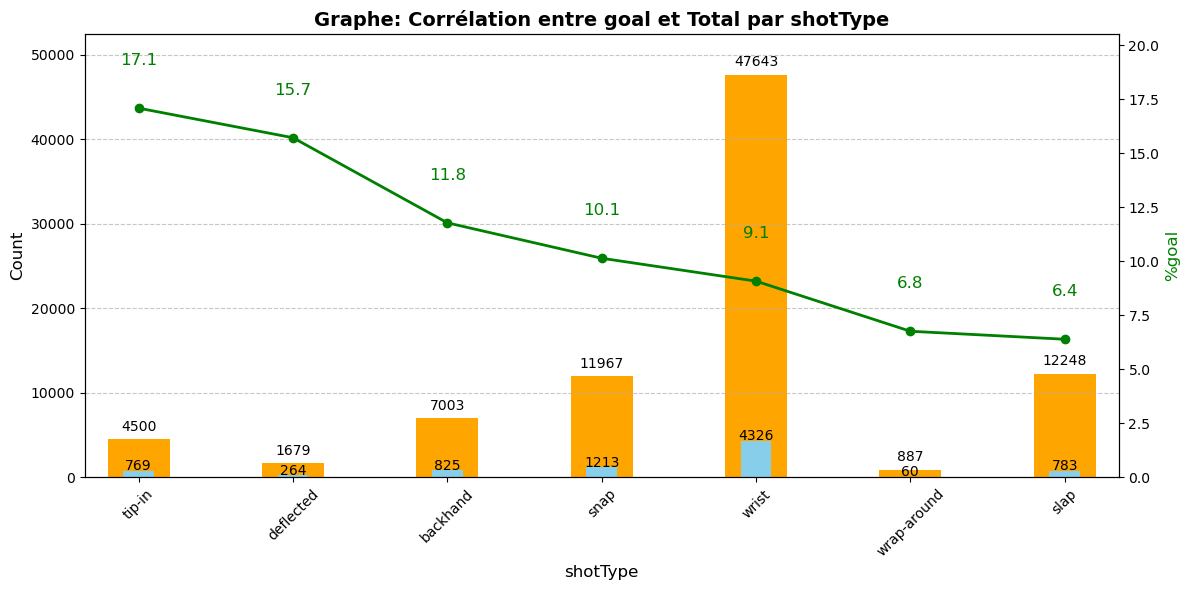

In [10]:
# Plot the correlation between the goal and the type of shot
corr_2018 = get_correlations_2variables(df_2018, 'shotType', 'typeDescKey')

# Plot the correlation between the goal and the type of shot
plot_correlations_2variables(corr_2018, 'Total', 'goal')

### Saison 2019

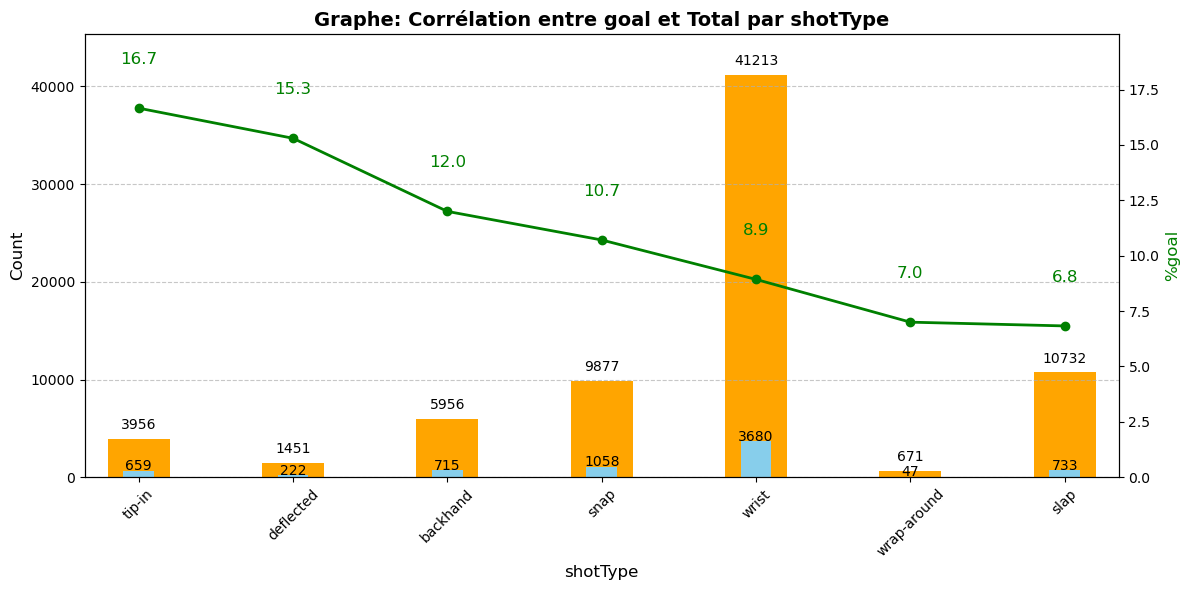

In [11]:
# Get the correlation between the goal and the type of shot
corr_2019 = get_correlations_2variables(df_2019, 'shotType', 'typeDescKey')

# Plot the correlation between the goal and the type of shot
plot_correlations_2variables(corr_2019, 'Total', 'goal')

### Saison 2020

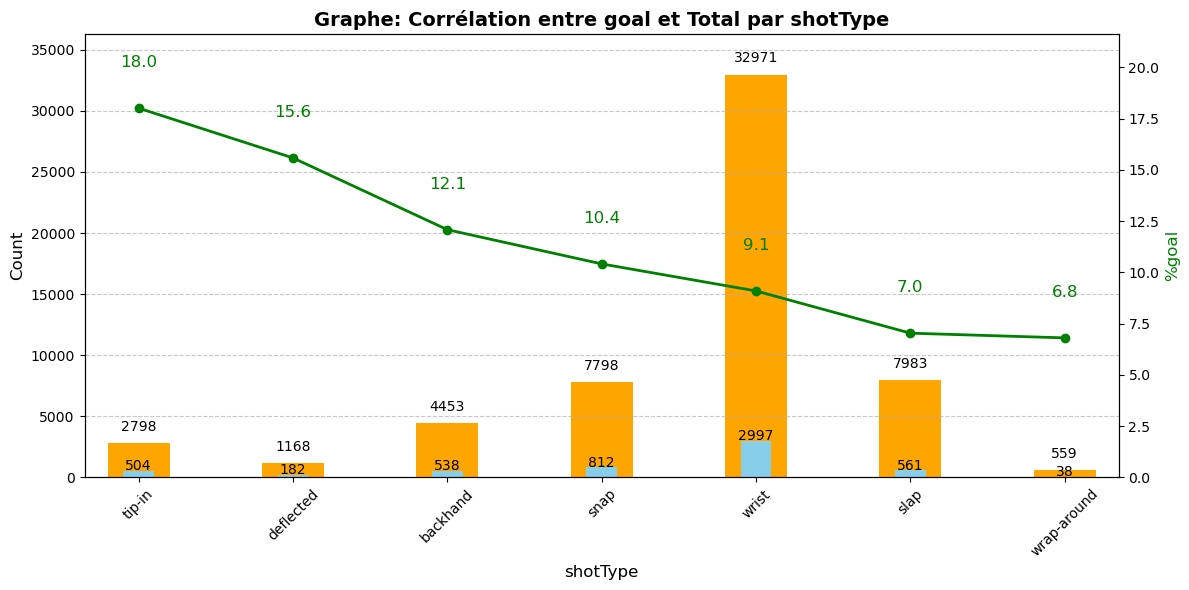

In [12]:
# Get the correlation between the goal and the type of shot
corr_2020 = get_correlations_2variables(df_2020, 'shotType', 'typeDescKey')

# Plot the correlation between the goal and the type of shot
plot_correlations_2variables(corr_2020, 'Total', 'goal')

### Observations au fil des années

In [13]:
# Correlation between 3 variables: goal, shot distance, and season (2018 to 2020)
corr_2018_to_2020 = get_correlations_3variables(df_2018_to_2020, 'GroupShotDistance', 'Year', 'typeDescKey', 'goal')
corr_2018_to_2020.head()

,2018_Total,2018_goal,2018_goal_%,2019_Total,2019_goal,2019_goal_%,2020_Total,2020_goal,2020_goal_%
GroupShotDistance,,,,,,,,,
a.Under 7 ft.,1721,389,22.60,1941,467,24.06,1545,340,22.01
b.7 - 14.9 ft.,16601,2844,17.13,13493,2452,18.17,10825,1931,17.84
c.15 - 29.9 ft.,20549,2670,12.99,17513,2268,12.95,13739,1802,13.12
d.30 - 44.9 ft.,20582,1331,6.47,17174,1096,6.38,13416,877,6.54
e.Over 45 ft.,26486,1016,3.84,23746,839,3.53,18209,686,3.77


### Courbe d'évolution

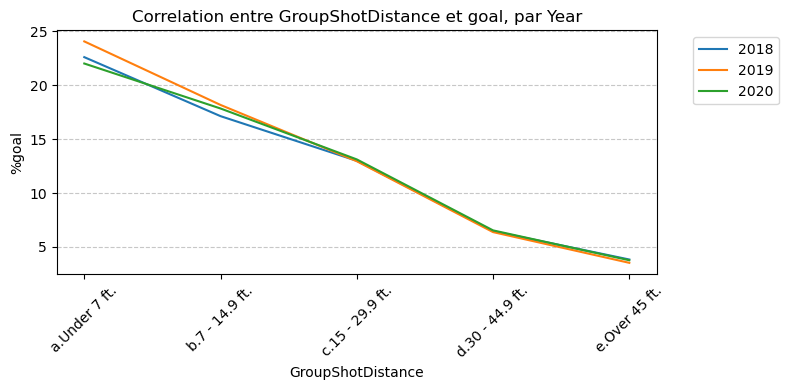

In [14]:
plot_graph_correlations(corr_2018_to_2020, 'goal', df_2018_to_2020, 'Year')

### Boxplot

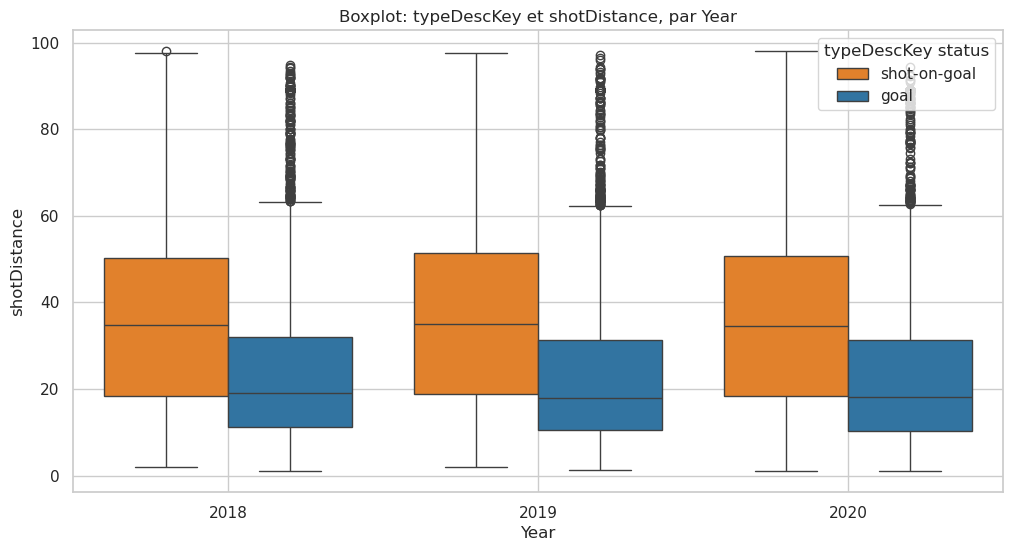

In [15]:
df_2018_to_2020.drop("GroupShotDistance", axis=1, inplace=True)
df_2018_to_2020.reset_index(drop=True, inplace=True)
plot_boxplot_correlations(df_2018_to_2020, 'Year', 'shotDistance', 'typeDescKey')

## Q2 - Analyse plus approfondie de la correlation sur l'année 2020.

### Statistiques descriptives pour la distance de tir

In [16]:
corr_2020 = get_correlations_3variables(df_2020, 'GroupShotDistance', 'shotType', 'typeDescKey', 'goal')

### Graphique à barres

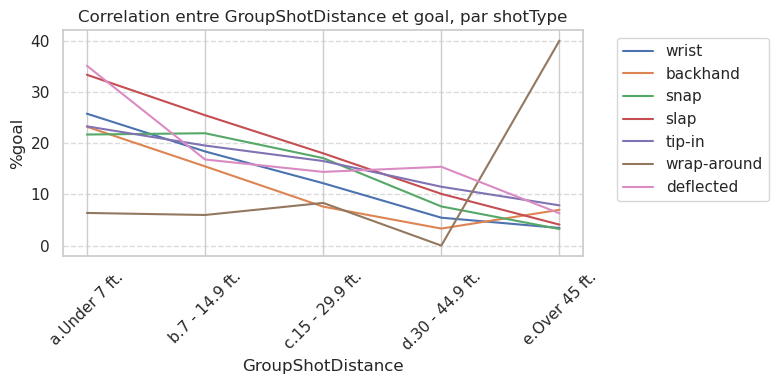

In [17]:
plot_graph_correlations(q=corr_2020, modality='goal', df=df_2020, column='shotType')

### Boxplot

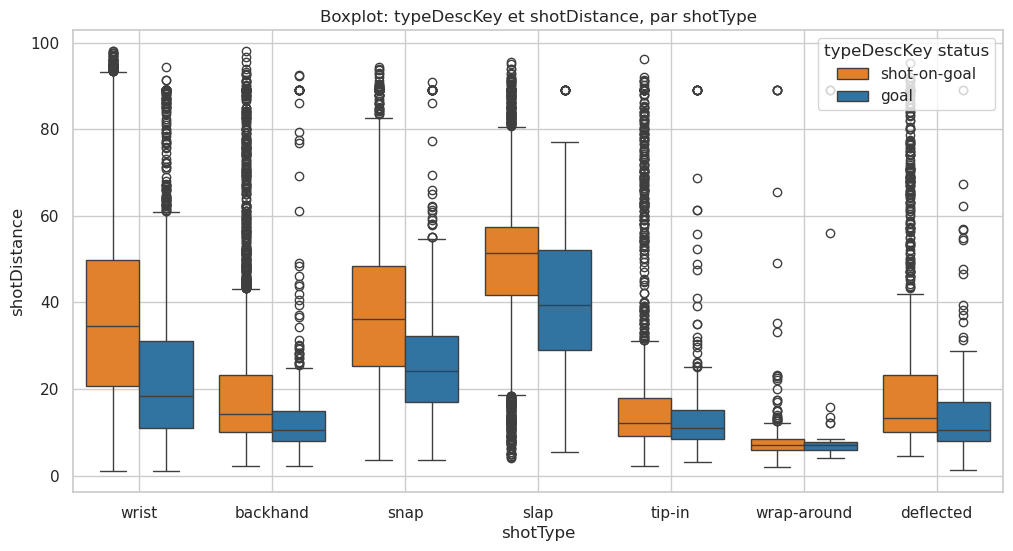

In [18]:
plot_boxplot_correlations(df_2020, 'shotType', 'shotDistance', 'typeDescKey')

# 5. Visualisation avancée
---


In [19]:
years = range(start_year, end_year + 1)  # Années à analyser
total_games_per_year = [len(clean_regular_season[year]) + 1 for year in years]  # Nombre de parties pour chaque année

all_team_shots_coords = {}  # Dictionnaire contenant les coordonnées de chaque tir par équipes par saison
for year in range(start_year, end_year + 1):
    all_team_shots_coords[year] = get_team_shots(clean_regular_season, clean_playoff,year)

AttributeError: 'tuple' object has no attribute 'isnull'

In [ ]:
# Example of shots mapping for the Ottawa Senators in 2018
plot_team_shots(clean_regular_season, 2018, 'Senators')

### 2. Calculer le taux de tir moyen par heure de la ligue par emplacement

In [ ]:
# Dictionnaire contenant le nombre de tirs par emplacement par partie pour chaque année
df_avg_shots_dict = avg_shots_per_game_per_location(years, total_games_per_year)

# Exemple d'accès avec l'année 2018
df_avg_shots_2018 = df_avg_shots_dict[2018]
df_avg_shots_2018.sort_values(by='Average Shots per Game', ascending=False).head(10)

In [ ]:
heatmap(df_avg_shots_2018, bins=51)

In [ ]:
# preparation 2016-2017 pour avoir 2016-2020
df_data_2016_2017 = convert_dictionaries_to_dataframes(clean_regular_season, clean_playoff, [2016, 2017])
# 2016-2020
df_data_2016_2020 = pd.concat([df_data_2016_2017, df_2018_to_2020], axis=0, ignore_index=True)
# df_data_2016_2020

df = df_data_2016_2020
df.insert(0, 'idPlay', range(1, len(df) + 1))

### Taux de tir moyen par heure dans la ligue : 2016-2020

In [ ]:
mean_shots_game_ligue = mean_shots_game_ligue(df, 'Year', 'idGame', 'idPlay')
mean_shots_game_ligue.head()

### Difference taux tir moyen des équipes par rapport à la ligue

In [ ]:
mean_df = mean_shots_game_team(df, 2017, 'eventOwnerTeam', 'idGame', 'idPlay', mean_shots_game_ligue)

#### Lissage avec KDE par noyau gaussien

In [ ]:
estimation_kde_noyau_gaussien(2017, mean_df)

#### 4. Afficher les données sur la zone offensive à l'aide de lissage par noyau gaussien

In [ ]:
smooth_heatmap(df_avg_shots_2018, bandwidth=1.0, grid_size=150)

#### 5 et 6. Graphique intéractif utilisant plotly. Un graphique pour chaque saison de 2016 à 2020.

In [ ]:
interactive_smooth_heatmap(year=2016)

In [ ]:
interactive_smooth_heatmap(year=2017)

In [ ]:
interactive_smooth_heatmap(year=2018)

In [ ]:
interactive_smooth_heatmap(year=2019)

In [ ]:
interactive_smooth_heatmap(year=2020)